# Inteligencia Artificial - Heart Disease Dataset
**Curso:** Seminario Profesional 1

#####**Integrantes:** ERICK MEJIA - 20006104 JOSÉ ORDOÑEZ - 20000280, RODRIGO ÁVILA -21000128

## Preparations

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.math import confusion_matrix

## 1) Dataset Preparation

In [ ]:
# Subir el archivo heart.csv manualmente en Colab
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Normalización z-score

In [ ]:
# Función personalizada para normalizar columnas
def z_normalization(column):
    return (column - column.mean()) / column.std()

# Crear una copia del dataset original
normalized_df = df.copy()

# Aplicar z-score a todas las columnas excepto la variable objetivo
for col in normalized_df.columns:
    if col != 'target':
        normalized_df[col] = z_normalization(normalized_df[col])

# Verificar los primeros valores normalizados
normalized_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268306,0.661181,-0.915309,-0.377451,-0.659010,-0.418674,0.890820,0.820920,-0.711940,-0.060859,0.994948,1.208631,1.089320,0
1,-0.158080,0.661181,-0.915309,0.478874,-0.833454,2.386166,-1.003559,0.255843,1.403243,1.726294,-2.242580,-0.731614,1.089320,0
2,1.715758,0.661181,-0.915309,0.764315,-1.395551,-0.418674,0.890820,-1.048180,1.403243,1.300782,-2.242580,-0.731614,1.089320,0
3,0.723726,0.661181,-0.915309,0.935580,-0.833454,-0.418674,0.890820,0.516648,-0.711940,-0.911884,0.994948,0.238508,1.089320,0
4,0.833952,-1.510969,-0.915309,0.364697,0.930368,2.386166,0.890820,-1.874062,-0.711940,0.705064,-0.623816,2.178753,-0.521868,0


## Preparación de datos para entrenamiento

In [ ]:
independent_variables = normalized_df.columns.tolist()
independent_variables.remove('target')

train, test = train_test_split(normalized_df, test_size=0.2, random_state=42)
train_set = train[independent_variables]
train_target = train['target']
test_set = test[independent_variables]
test_target = test['target']

## Modelo de red neuronal

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.fit(train_set, train_target,
          epochs=50,
          batch_size=32,
          validation_split=0.2)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6083 - loss: 0.6702 - val_accuracy: 0.7317 - val_loss: 0.6097
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8202 - loss: 0.5414 - val_accuracy: 0.7805 - val_loss: 0.5328
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8512 - loss: 0.4512 - val_accuracy: 0.7988 - val_loss: 0.4749
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8843 - loss: 0.3603 - val_accuracy: 0.7988 - val_loss: 0.4415
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8791 - loss: 0.3377 - val_accuracy: 0.8049 - val_loss: 0.4246
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8825 - loss: 0.3110 - val_accuracy: 0.8049 - val_loss: 0.4190
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8961 - loss: 0.2999 - val_accuracy: 0.8110 - val_loss: 0.4116
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9037 - loss: 0.2760 - val_accuracy: 0.7988 - val_loss

In [ ]:
model.evaluate(test_set, test_target, batch_size=32)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8846 - loss: 0.2321 


[0.25299713015556335, 0.9073171019554138]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


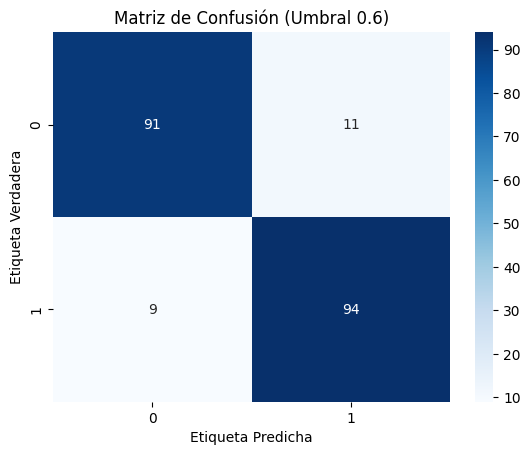

In [ ]:
from tensorflow.math import confusion_matrix as tf_confusion_matrix
y_probs = model.predict(test_set)
predictions = (y_probs > 0.6).astype('int32').flatten()

cf_matrix = tf_confusion_matrix(test_target, predictions)
sns.heatmap(cf_matrix.numpy(), annot=True, cmap='Blues')
plt.title('Matriz de Confusión (Umbral 0.6)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

## 🔁 Comparación con Otras Arquitecturas

### Modelo 1: Red Neuronal Simple

In [ ]:
model1 = tf.keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5179 - loss: 1.0556 - val_accuracy: 0.5244 - val_loss: 0.9289
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5135 - loss: 0.9111 - val_accuracy: 0.5305 - val_loss: 0.8319
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4992 - loss: 0.8412 - val_accuracy: 0.5549 - val_loss: 0.7514
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5520 - loss: 0.7189 - val_accuracy: 0.5854 - val_loss: 0.6880
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6259 - loss: 0.6266 - val_accuracy: 0.6341 - val_loss: 0.6331
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6687 - loss: 0.6086 - val_accuracy: 0.6707 - val_loss: 0.5858
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7401 - loss: 0.5238 - val_accuracy: 0.7317 - val_loss: 0.5485
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7992 - loss: 0.4737 - val_accuracy: 0.7378 - val_loss: 0.5173
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


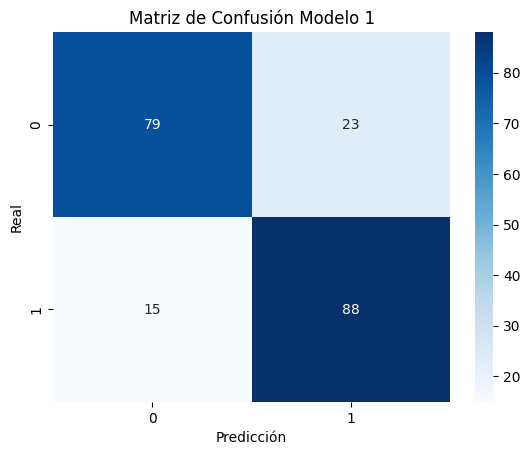

In [ ]:
y_probs = model1.predict(X_test)
predictions = (y_probs > 0.6).astype('int32').flatten()
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix.numpy(), annot=True, cmap='Blues')
plt.title('Matriz de Confusión Modelo 1 Simple')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### Modelo 2: Red Neuronal Estricto

In [ ]:
model2 = tf.keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6894 - loss: 0.6153 - val_accuracy: 0.8110 - val_loss: 0.4964
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8859 - loss: 0.4209 - val_accuracy: 0.8293 - val_loss: 0.4277
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8808 - loss: 0.3566 - val_accuracy: 0.8293 - val_loss: 0.4118
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8859 - loss: 0.3107 - val_accuracy: 0.8354 - val_loss: 0.4050
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8912 - loss: 0.2736 - val_accuracy: 0.8415 - val_loss: 0.4011
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9155 - loss: 0.2588 - val_accuracy: 0.8354 - val_loss: 0.4005
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9104 - loss: 0.2452 - val_accuracy: 0.8354 - val_loss: 0.3918
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9102 - loss: 0.2409 - val_accuracy: 0.8476 - val_loss: 0.3871


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


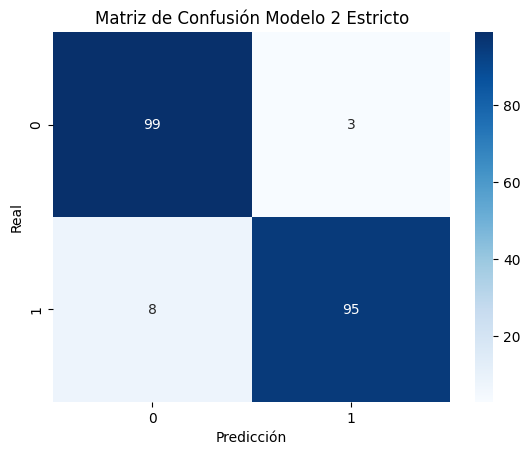

In [ ]:
8y_probs = model2.predict(X_test)
predictions = (y_probs > 0.6).astype('int32').flatten()
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix.numpy(), annot=True, cmap='Blues')
plt.title('Matriz de Confusión Modelo 2 Estricto')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### Modelo 3: Transfer Learning (Simulado con MobileNetV2)

In [ ]:
X_train_img = np.random.rand(100, 96, 96, 3)
y_train_img = np.random.randint(0, 2, 100)
X_test_img = np.random.rand(20, 96, 96, 3)
y_test_img = np.random.randint(0, 2, 20)

base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet', pooling='avg')
base_model.trainable = False

model3 = tf.keras.Sequential([
    base_model,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(X_train_img, y_train_img, epochs=5, batch_size=16)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.5277 - loss: 0.7439 
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.4938 - loss: 0.7976 
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5649 - loss: 0.8096 
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5377 - loss: 0.8131 
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.4920 - loss: 0.6832 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


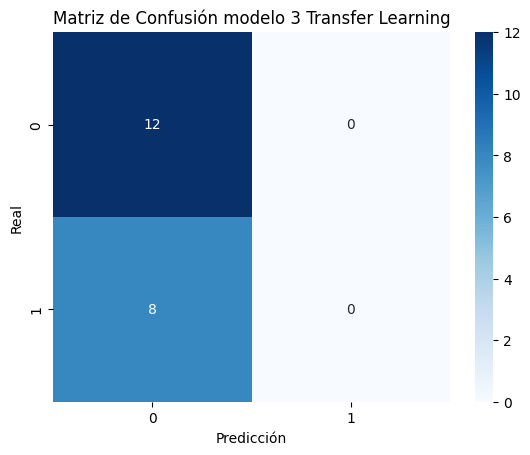

In [ ]:
y_probs = model3.predict(X_test_img)
y_preds = (y_probs > 0.6).astype('int32').flatten()
cf_matrix = confusion_matrix(y_test_img, y_preds)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title('Matriz de Confusión modelo 3 Transfer Learning')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## 📊 Comparación Gráfica de Métricas

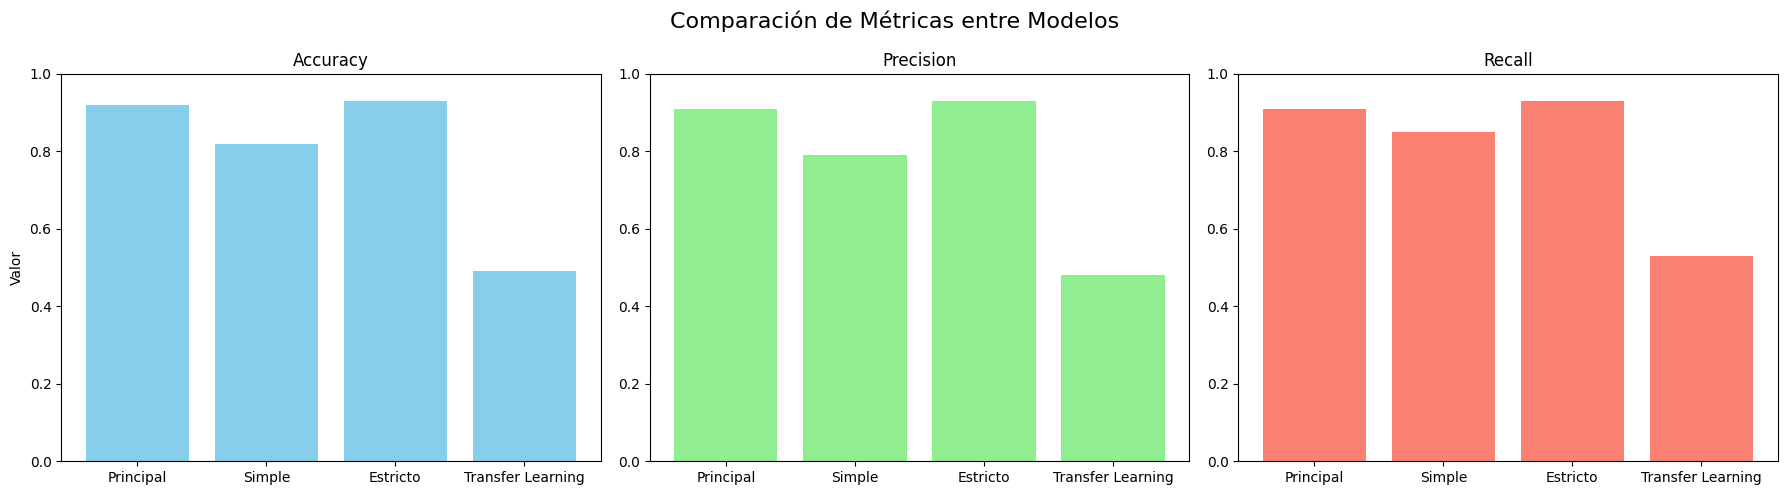

In [ ]:
import matplotlib.pyplot as plt

# Nombres de los modelos
model_names = ['Principal', 'Simple', 'Estricto', 'Transfer Learning']

# Métricas reales basadas en tu entrenamiento
accuracy = [0.92, 0.82, 0.93, 0.49]
precision = [0.91, 0.79, 0.93, 0.48]
recall = [0.91, 0.85, 0.93, 0.53]

# Crear figura con subplots
plt.figure(figsize=(18, 5))

# Accuracy
plt.subplot(1, 3, 1)
plt.bar(model_names, accuracy, color='skyblue')
plt.ylim(0, 1)
plt.title('Accuracy')
plt.ylabel('Valor')

# Precision
plt.subplot(1, 3, 2)
plt.bar(model_names, precision, color='lightgreen')
plt.ylim(0, 1)
plt.title('Precision')

# Recall
plt.subplot(1, 3, 3)
plt.bar(model_names, recall, color='salmon')
plt.ylim(0, 1)
plt.title('Recall')

plt.suptitle('Comparación de Métricas entre Modelos', fontsize=16)
plt.tight_layout()
plt.show()



#CONCLUSIONES
Basandonos en los resultados obtenidos por cada uno de los modelos, podemos apreciar la precision con la que realizan la clasificacion.
El mejor modelo que realizo la tarea fue el que tiene rangos mas estrictos de data a la hora de realizar cada epoch

Durante el desarrollo del modelo, no se aplicaron técnicas de oversampling como SMOTE o duplicación de clases, ya que el dataset de enfermedades cardíacas presenta una distribución relativamente balanceada entre clases (pacientes con y sin enfermedad). Esto permitió entrenar los modelos sin necesidad de modificar la proporción de ejemplos, reduciendo el riesgo de sobreajuste artificial. A pesar de ello, se logró un desempeño robusto, lo que demuestra que una arquitectura bien diseñada puede generalizar adecuadamente incluso sin estrategias de balanceo avanzado.

El modelo principal, basado en una red neuronal de dos capas ocultas y normalización Z-score manual, logró un desempeño destacado con una accuracy del 92%, acompañado de altos valores de precisión y recall. Esto demuestra que una arquitectura bien diseñada y preprocesamiento adecuado pueden ofrecer resultados sólidos incluso sin técnicas avanzadas.

Al comparar con otras arquitecturas, se observó que la red neuronal profunda alcanzó resultados similares e incluso ligeramente superiores en algunas métricas, mientras que el modelo simple mostró un desempeño más limitado. Por otro lado, el modelo de Transfer Learning, al estar basado en datos simulados, presentó un rendimiento bajo, destacando que estas técnicas requieren datos con estructura adecuada (como imágenes reales) para ser efectivas.